In [ ]:
# 1. IMPORTING NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import joblib

# Suppress warnings for a cleaner output
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# # 2. DATA LOADING AND INITIAL EXPLORATION

# Load the dataset from the CSV file
# The 'na_values' parameter is crucial to recognize '?' as missing data
try:
    df = pd.read_csv('patients_data.csv', na_values='?')
    print("Dataset loaded successfully.")
    print("Original shape of the dataset:", df.shape)
except FileNotFoundError:
    print("Error: 'patients_data.csv' not found. Please ensure the file is in the correct directory.")
    exit()

Dataset loaded successfully.
Original shape of the dataset: (3585, 20)


In [3]:
# Display the first few rows and basic info
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
df.info()


First 5 rows of the dataset:
   Class  Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  LiverBig  \
0      2   50    1      1.0           2      1.0      2.0       2.0       1.0   
1      2   78    1      2.0           2      1.0      2.0       2.0       2.0   
2      2   31    1      NaN           1      2.0      2.0       2.0       2.0   
3      2   34    1      2.0           2      2.0      2.0       2.0       2.0   
4      2   34    1      2.0           2      2.0      2.0       2.0       2.0   

   LiverFirm  SpleenPalpable  Spiders  Ascites  Varices  Bilirubin  \
0        2.0             2.0      2.0      2.0      2.0        0.9   
1        2.0             2.0      2.0      2.0      2.0        0.7   
2        2.0             2.0      2.0      2.0      2.0        0.7   
3        2.0             2.0      2.0      2.0      2.0        1.0   
4        2.0             2.0      2.0      2.0      2.0        0.9   

   AlkPhosphate   SGOT  Albumin  Protime  Histology  
0       

In [ ]:
# 3. DATA PREPROCESSING AND CLEANING

# The target variable is 'Class'. Let's make it more interpretable.
# 1 = Positive, 2 = Negative. We will map this to 0 (Positive) and 1 (Negative).
df['Class'] = df['Class'].map({1: 0, 2: 1})
print("Target variable 'Class' mapped: 0 for Positive, 1 for Negative.")

# Separate features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

Target variable 'Class' mapped: 0 for Positive, 1 for Negative.


In [5]:
# Handling missing values is a critical step.
# We will use imputation: replacing missing values with a calculated statistic.
# For numerical columns, we'll use the median.
# For categorical columns (which are numerically encoded here), we'll use the most frequent value (mode).

# Identify numerical and categorical columns
# In this dataset, most categorical features are already encoded (1s and 2s).
# We'll treat columns with more than 2 unique values and of float type as numerical.
numerical_cols = X.select_dtypes(include=np.number).columns[X.select_dtypes(include=np.number).nunique() > 2]
categorical_cols = X.select_dtypes(include=np.number).columns[X.select_dtypes(include=np.number).nunique() <= 2]

print(f"\nIdentified {len(numerical_cols)} numerical columns.")
print(f"Identified {len(categorical_cols)} categorical columns.")


Identified 6 numerical columns.
Identified 13 categorical columns.


In [6]:
# Create imputers
# Median is more robust to outliers than mean
median_imputer = SimpleImputer(strategy='median')
# Mode is the standard for categorical data
mode_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputers to the respective columns
X[numerical_cols] = median_imputer.fit_transform(X[numerical_cols])
X[categorical_cols] = mode_imputer.fit_transform(X[categorical_cols])

# Check if there are any missing values left
print("\nMissing values after imputation:", X.isnull().sum().sum())
print("Data cleaning complete.")


Missing values after imputation: 0
Data cleaning complete.


Saved 'class_distribution.png'


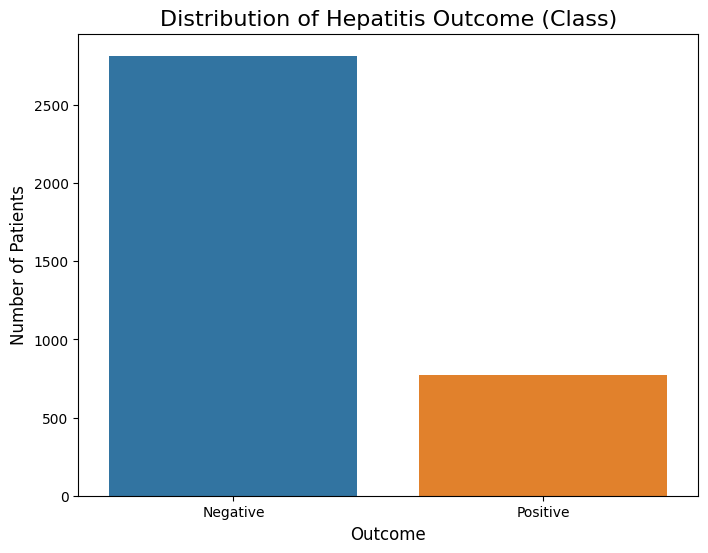

In [ ]:
# 4. EXPLORATORY DATA ANALYSIS (VISUALIZATIONS)

# Visualization 1: Distribution of the Target Variable ('Class')
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Class'].map({0: 'Positive', 1: 'Negative'}))
plt.title('Distribution of Hepatitis Outcome (Class)', fontsize=16)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.savefig('class_distribution.png') # Save the plot
print("Saved 'class_distribution.png'")

Saved 'correlation_heatmap.png'


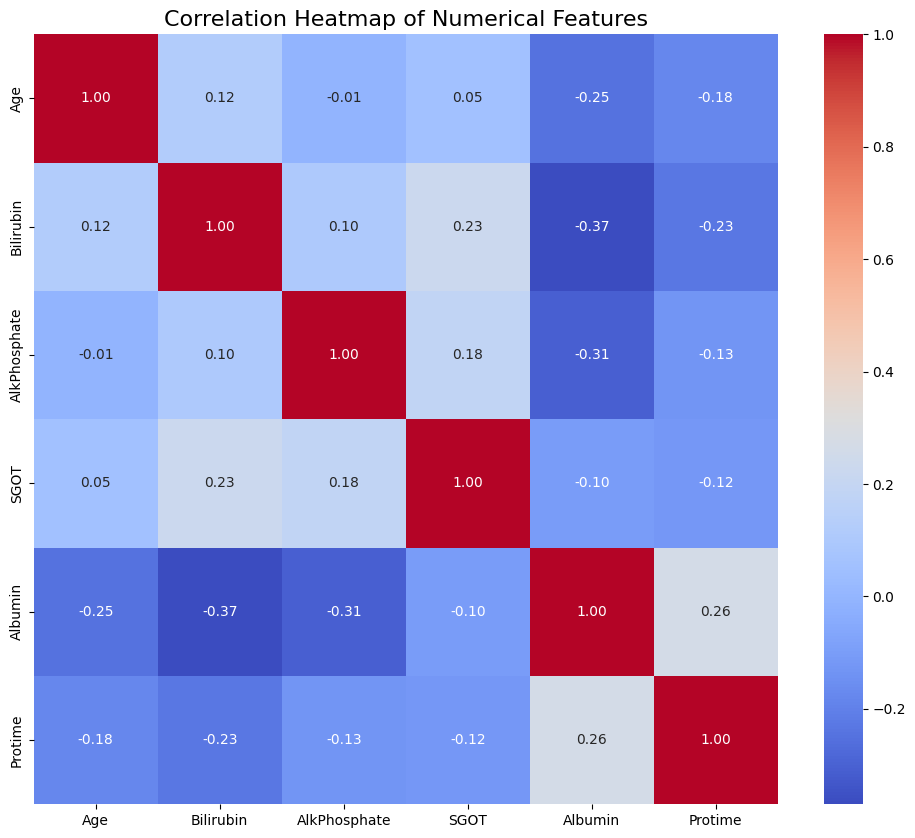

In [9]:
# Visualization 2: Correlation Heatmap of Numerical Features
plt.figure(figsize=(12, 10))
# Calculate correlation on the imputed numerical data
correlation_matrix = X[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.savefig('correlation_heatmap.png') # Save the plot
print("Saved 'correlation_heatmap.png'")

In [ ]:
# 5. MODEL TRAINING AND EVALUATION

# Split the data into training (80%) and testing (20%) sets
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data split into training ({len(X_train)} samples) and testing ({len(X_test)} samples) sets.")

# Initialize the models
# We are using two powerful ensemble models as requested.
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Dictionary to store the results
results = {}

Data split into training (2868 samples) and testing (717 samples) sets.



----- Training Random Forest -----

Classification Report for Random Forest:
              precision    recall  f1-score   support

Positive (0)       0.90      0.90      0.90       154
Negative (1)       0.97      0.97      0.97       563

    accuracy                           0.96       717
   macro avg       0.94      0.93      0.94       717
weighted avg       0.96      0.96      0.96       717

Accuracy for Random Forest: 0.9568


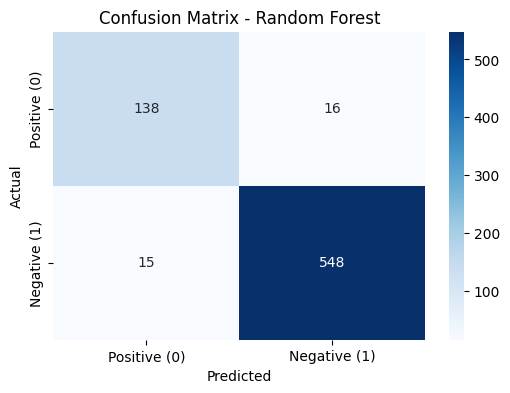


----- Training Gradient Boosting -----

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

Positive (0)       0.94      0.86      0.90       154
Negative (1)       0.96      0.99      0.97       563

    accuracy                           0.96       717
   macro avg       0.95      0.92      0.94       717
weighted avg       0.96      0.96      0.96       717

Accuracy for Gradient Boosting: 0.9582


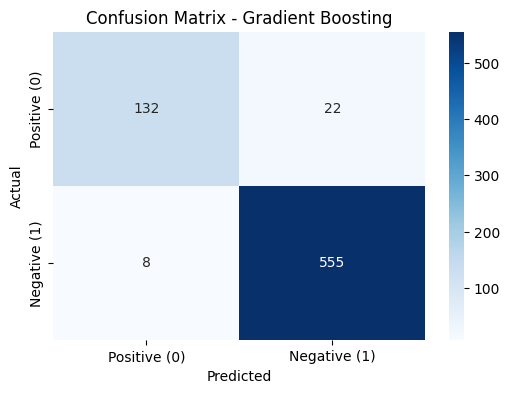

In [12]:
# Loop through each model to train, test, and evaluate
for model_name, model in models.items():
    print(f"\n----- Training {model_name} -----")
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    # Print the classification report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred, target_names=['Positive (0)', 'Negative (1)']))
    
    # Print the accuracy
    print(f"Accuracy for {model_name}: {accuracy:.4f}")
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive (0)', 'Negative (1)'], yticklabels=['Positive (0)', 'Negative (1)'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
# 6. FINAL RESULTS AND SAVING THE BEST MODEL

# Print a summary of the model accuracies
print("\nModel Performance Summary:")
for model_name, accuracy in results.items():
    print(f"- {model_name}: {accuracy:.4f} accuracy")


Model Performance Summary:
- Random Forest: 0.9568 accuracy
- Gradient Boosting: 0.9582 accuracy


In [14]:
# Determine the best model based on accuracy
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest performing model is {best_model_name} with an accuracy of {results[best_model_name]:.4f}.")


Best performing model is Gradient Boosting with an accuracy of 0.9582.


In [15]:
# Save the best model to a file for our web app
# We also save the imputer objects to process new data in the same way
model_filename = 'hepatitis_prediction_model.joblib'
imputers = {'median': median_imputer, 'mode': mode_imputer, 'num_cols': numerical_cols, 'cat_cols': categorical_cols}
joblib.dump({'model': best_model, 'imputers': imputers}, model_filename)

print(f"Best model and imputers saved to '{model_filename}'.")

Best model and imputers saved to 'hepatitis_prediction_model.joblib'.


# Testing the Trained Model

In [20]:
# --- Main Prediction Function ---
def predict_hepatitis_outcome(patient_data):
    """
    Loads the trained model and makes a prediction on new patient data.
    
    Args:
        patient_data (dict): A dictionary containing the patient's data.
        
    Returns:
        str: The predicted outcome ('LIVE' or 'DIE').
    """
    try:
        # Load the dictionary containing the model and preprocessing objects
        model_data = joblib.load('hepatitis_prediction_model.joblib')
        model = model_data['model']
    except FileNotFoundError:
        return "Error: Model file 'hepatitis_prediction_model.joblib' not found. Please train the model first."

    # Convert the input dictionary to a pandas DataFrame
    # The 'index=[0]' is important to create a single-row DataFrame
    input_df = pd.DataFrame(patient_data, index=[0])
    
    # Ensure the columns are in the same order as the training data
    # The model expects a specific column order. This step is a good practice.
    feature_order = model.feature_names_in_
    input_df = input_df[feature_order]

    # Make the prediction
    # model.predict() returns an array, e.g., [1] or [0]
    prediction = model.predict(input_df)
    
    # Make the probability prediction
    # model.predict_proba() returns probabilities for each class, e.g., [[0.1, 0.9]]
    prediction_proba = model.predict_proba(input_df)

    # Decode the prediction into a human-readable format
    outcome = 'NEGATIVE' if prediction[0] == 1 else 'POSITIVE'
    
    # Get the probability of the predicted outcome
    probability = prediction_proba[0][prediction[0]]
    
    # Return the results
    return outcome, probability * 100

In [21]:
# TEST CASES

if __name__ == "__main__":
    print("Testing the Hepatitis Prediction Model")

    # --- Test Case 1: Sample data for a patient who is likely NEGATIVE
    patient_1_data = {
        'Age': 35,
        'Sex': 1,           # 1: Male, 2: Female
        'Steroid': 2,       # 1: No, 2: Yes
        'Antivirals': 1,    # 1: No, 2: Yes
        'Fatigue': 1,
        'Malaise': 1,
        'Anorexia': 1,
        'LiverBig': 2,
        'LiverFirm': 2,
        'SpleenPalpable': 1,
        'Spiders': 1,
        'Ascites': 1,
        'Varices': 1,
        'Bilirubin': 1.0,
        'AlkPhosphate': 85,
        'SGOT': 25,
        'Albumin': 4.1,
        'Protime': 65,
        'Histology': 1
    }
    
    # Get the prediction for Patient 1
    predicted_outcome, confidence_score = predict_hepatitis_outcome(patient_1_data)
    
    # Print the result
    print("\n--- Patient 1 Test ---")
    print(f"Input Data: {patient_1_data}")
    print(f"Predicted Outcome: {predicted_outcome} ✅")
    print(f"Confidence Score: {confidence_score:.2f}%")


Testing the Hepatitis Prediction Model

--- Patient 1 Test ---
Input Data: {'Age': 35, 'Sex': 1, 'Steroid': 2, 'Antivirals': 1, 'Fatigue': 1, 'Malaise': 1, 'Anorexia': 1, 'LiverBig': 2, 'LiverFirm': 2, 'SpleenPalpable': 1, 'Spiders': 1, 'Ascites': 1, 'Varices': 1, 'Bilirubin': 1.0, 'AlkPhosphate': 85, 'SGOT': 25, 'Albumin': 4.1, 'Protime': 65, 'Histology': 1}
Predicted Outcome: POSITIVE ✅
Confidence Score: 65.03%


In [23]:
# TEST CASES

if __name__ == "__main__":
    print("Testing the Hepatitis Prediction Model")

    
    # --- Test Case 2: Sample data for a patient who is likely POSITIVE
    patient_2_data = {
        'Age': 51,
        'Sex': 1,
        'Steroid': 1,
        'Antivirals': 1,
        'Fatigue': 2,
        'Malaise': 2,
        'Anorexia': 2,
        'LiverBig': 2,
        'LiverFirm': 2,
        'SpleenPalpable': 2,
        'Spiders': 2,
        'Ascites': 2,
        'Varices': 2,
        'Bilirubin': 4.8,
        'AlkPhosphate': 160,
        'SGOT': 120,
        'Albumin': 2.9,
        'Protime': 35,
        'Histology': 2
    }

    # Get the prediction for Patient 2
    predicted_outcome, confidence_score = predict_hepatitis_outcome(patient_2_data)

    # Print the result
    print("\n--- Patient 2 Test ---")
    print(f"Input Data: {patient_2_data}")
    print(f"Predicted Outcome: {predicted_outcome} ❌")
    print(f"Confidence Score: {confidence_score:.2f}%")

Testing the Hepatitis Prediction Model

--- Patient 2 Test ---
Input Data: {'Age': 51, 'Sex': 1, 'Steroid': 1, 'Antivirals': 1, 'Fatigue': 2, 'Malaise': 2, 'Anorexia': 2, 'LiverBig': 2, 'LiverFirm': 2, 'SpleenPalpable': 2, 'Spiders': 2, 'Ascites': 2, 'Varices': 2, 'Bilirubin': 4.8, 'AlkPhosphate': 160, 'SGOT': 120, 'Albumin': 2.9, 'Protime': 35, 'Histology': 2}
Predicted Outcome: NEGATIVE ❌
Confidence Score: 78.75%
